In [1]:
import numpy
from scipy.linalg import solve
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.size']=16
rcParams['font.family']='serif'

In [2]:
alpha=0.0001
L=0.01
H=0.01
nx=21
ny=21
nt=300
dx=L/(nx-1)
dy=H/(ny-1)
x=numpy.linspace(0,L,nx)
y=numpy.linspace(0,H,ny)
T_bc=100.
Ti=numpy.ones((ny,nx))*20.
Ti[0,:]=T_bc
Ti[:,0]=T_bc

In [3]:
def constructMatrix(nx,ny,sigma):
    A=numpy.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    n=0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            if i==1 and j==1:
                A[n,n]=1/sigma+4
                A[n,n+1]=-1
                A[n,n+nx-2]=-1
            elif i==nx-2 and j==1:
                A[n,n]=1/sigma+3
                A[n,n-1]=-1
                A[n,n+nx-2]=-1
            elif i==1 and j==ny-2:
                A[n,n]=1/sigma+3
                A[n,n+1]=-1
                A[n,n-(nx-2)]=-1
            elif i==nx-2 and j==ny-2:
                A[n,n]=1/sigma+2
                A[n,n-1]=-1
                A[n,n-(nx-2)]=-1
            elif i==1:
                A[n,n]=1/sigma+4
                A[n,n+1]=-1
                A[n,n+nx-2]=-1
                A[n,n-(nx-2)]=-1
            elif i==nx-2:
                A[n,n]=1/sigma+3
                A[n,n-1]=-1
                A[n,n+nx-2]=-1
                A[n,n-(nx-2)]=-1
            elif j==1:
                A[n,n]=1/sigma+4
                A[n,n+1]=-1
                A[n,n-1]=-1
                A[n,n+nx-2]=-1
            elif j==ny-2:
                A[n,n]=1/sigma+3
                A[n,n+1]=-1
                A[n,n-1]=-1
                A[n,n-(nx-2)]=-1
            else:
                A[n,n]=1/sigma+4
                A[n,n+1]=-1
                A[n,n-1]=-1
                A[n,n+nx-2]=-1
                A[n,n-(nx-2)]=-1
            n+=1
    return A

In [4]:
def generateRHS(nx,ny,sigma,T,T_bc):
    RHS=numpy.zeros((nx-2)*(ny-2))
    n=0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            if i==1 and j==1:
                RHS[n]=T[j,i]/sigma+2*T_bc
            elif i==nx-2 and j==1:
                RHS[n]=T[j,i]/sigma+T_bc
            elif i==1 and j==ny-2:
                RHS[n]=T[j,i]/sigma+T_bc
            elif i==nx-2 and j==ny-2:
                RHS[n]=T[j,i]/sigma
            elif i==1:
                RHS[n]=T[j,i]/sigma+T_bc
            elif i==nx-2:
                RHS[n]=T[j,i]/sigma
            elif j==1:
                RHS[n]=T[j,i]/sigma+T_bc
            elif j==ny-2:
                RHS[n]=T[j,i]/sigma
            else:
                RHS[n]=T[j,i]/sigma
            n+=1
    return RHS

In [5]:
def map_1Dto2D(nx,ny,T_1D,T_bc):
    T=numpy.zeros((ny,nx))
    n=0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            T[j,i]=T_1D[n]
            n+=1
    T[0,:]=T_bc
    T[:,0]=T_bc
    T[-1,:]=T[-2,:]
    T[:,-1]=T[:,-2]
    return T

In [6]:
def btcs_2D(T,A,nt,sigma,T_bc,nx,ny,dt):
    j_mid=(numpy.shape(T)[0])/2
    i_mid=(numpy.shape(T)[1])/2
    for t in range(nt):
        Tn=T.copy()
        b=generateRHS(nx,ny,sigma,Tn,T_bc)
        T_interior=solve(A,b)
        T=map_1Dto2D(nx,ny,T_interior,T_bc)
        if T[j_mid,i_mid]>=70:
            print('Center of plate reached 70C at time {0:.2f}s.'.format(dt*t,t))
            break
    if T[j_mid,i_mid]<70:
        print('Center of plate has not reached 70C yet, it is only {0:.2f}C.'.format(T[j_mid,i_mid]))
    return T

In [7]:
sigma=.25
A=constructMatrix(nx,ny,sigma)
dt=sigma*min(dx,dy)**2/alpha
T=btcs_2D(Ti.copy(),A,nt,sigma,T_bc,nx,ny,dt)

C:\Users\yujia\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yujia\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Center of plate reached 70C at time 0.16s.


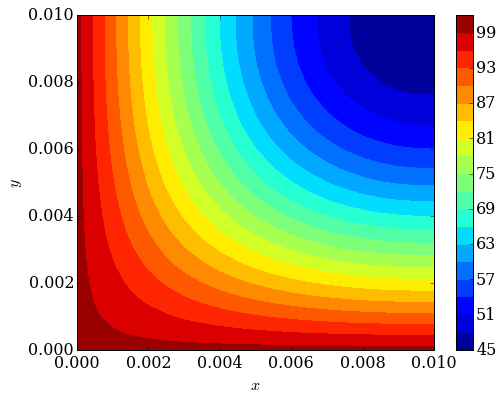

In [8]:
mx,my=numpy.meshgrid(x,y)
pyplot.figure(figsize=(8,6))
pyplot.contourf(my,mx,T,20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();